In [56]:
"""
Exercise 3: Training Models
PyTorch Workflow Fundamentals - Module 2

This exercise covers:
- Setting up loss functions
- Using optimizers
- Implementing the 5-step training loop
- Tracking training progress
- Visualizing training curves

Learning Mottos:
- If in doubt, run the code!
- Experiment, experiment, experiment!
- Visualize, visualize, visualize!
"""

'\nExercise 3: Training Models\nPyTorch Workflow Fundamentals - Module 2\n\nThis exercise covers:\n- Setting up loss functions\n- Using optimizers\n- Implementing the 5-step training loop\n- Tracking training progress\n- Visualizing training curves\n\nLearning Mottos:\n- If in doubt, run the code!\n- Experiment, experiment, experiment!\n- Visualize, visualize, visualize!\n'

In [57]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Set random seed for reproducibility
torch.manual_seed(42)

In [58]:
print("=" * 60)
print("Part 1: Setup - Data and Model")
print("=" * 60)

Part 1: Setup - Data and Model


In [59]:
# TODO: Create synthetic data
weight = 0.7
bias = 0.3
X = torch.arange(0, 1, 0.02).unsqueeze(dim=1)
y = weight * X + bias

# TODO: Split data
train_split = int(0.7 * len(X))
val_split = int(0.85 * len(X))

X_train, y_train = X[:train_split], y[:train_split]
X_val, y_val = X[train_split:val_split], y[train_split:val_split]

print(f"Train size: {len(X_train)}")
print(f"Validation size: {len(X_val)}")

# TODO: Create model
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weight = nn.Parameter(torch.randn(1))
        self.bias = nn.Parameter(torch.randn(1))

    def forward(self, x):
        return self.weight * x + self.bias


model = LinearRegressionModel()

print(f"\nInitial parameters:")
print(f"  Weight: {model.weight.item():.4f} (true: {weight})")
print(f"  Bias: {model.bias.item():.4f} (true: {bias})")

Train size: 35
Validation size: 7

Initial parameters:
  Weight: 0.3367 (true: 0.7)
  Bias: 0.1288 (true: 0.3)


In [60]:

print("\n" + "=" * 60)
print("Part 2: Loss Function and Optimizer")
print("=" * 60)


Part 2: Loss Function and Optimizer


In [61]:
# TODO: Define loss function
criterion = nn.MSELoss()
print(f"Loss function: MSELoss (Mean Squared Error)")

Loss function: MSELoss (Mean Squared Error)


In [62]:

# TODO: Define optimizer
optimizer = optim.SGD(model.parameters(), lr=0.01)
print(f"Optimizer: SGD (learning rate=0.01)")

Optimizer: SGD (learning rate=0.01)


In [63]:

# TODO: Calculate initial loss
with torch.no_grad():
    initial_pred = model(X_train)
    initial_loss = criterion(initial_pred, y_train)

print(f"\nInitial training loss: {initial_loss.item():.4f}")


Initial training loss: 0.0922


In [64]:
print("\n" + "=" * 60)
print("Part 3: The 5-Step Training Loop")
print("=" * 60)


Part 3: The 5-Step Training Loop


In [65]:
# TODO: Implement one training step
print("\nOne training step:")

# Step 1: Forward pass
y_pred = model(X_train)
print(f"1. Forward pass - predictions shape: {y_pred.shape}")

# Step 2: Calculate loss
loss = criterion(y_pred, y_train)
print(f"2. Calculate loss - loss value: {loss.item():.4f}")

# Step 3: Zero gradients
optimizer.zero_grad()
print(f"3. Zero gradients - cleared previous gradients")

# Step 4: Backward pass
loss.backward()
print(f"4. Backward pass - computed gradients")
print(f"   Weight gradient: {model.weight.grad.item():.4f}")
print(f"   Bias gradient: {model.bias.grad.item():.4f}")

# Step 5: Update parameters
optimizer.step()
print(f"5. Update parameters - optimizer stepped")

print(f"\nParameters after one step:")
print(f"  Weight: {model.weight.item():.4f}")
print(f"  Bias: {model.bias.item():.4f}")


One training step:
1. Forward pass - predictions shape: torch.Size([35, 1])
2. Calculate loss - loss value: 0.0922
3. Zero gradients - cleared previous gradients
4. Backward pass - computed gradients
   Weight gradient: -0.2301
   Bias gradient: -0.5894
5. Update parameters - optimizer stepped

Parameters after one step:
  Weight: 0.3390
  Bias: 0.1347


In [66]:
print("\n" + "=" * 60)
print("Part 4: Complete Training Loop")
print("=" * 60)


Part 4: Complete Training Loop


In [67]:
# TODO: Reinitialize model
model = LinearRegressionModel()
optimizer = optim.SGD(model.parameters(), lr=0.01)

epochs = 100
train_losses = []
val_losses = []

print(f"\nTraining for {epochs} epochs...")
print("-" * 60)

for epoch in range(epochs):
    ### Training
    model.train()
    y_pred = model(X_train)
    loss = criterion(y_pred, y_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    train_losses.append(loss.item())

    ### Validation
    model.eval()
    with torch.no_grad():
        val_pred = model(X_val)
        val_loss = criterion(val_pred, y_val)
        val_losses.append(val_loss.item())

    ### Print progress
    if epoch % 20 == 0:
        print(f"Epoch {epoch:3d}: Train Loss = {loss.item():.4f}, Val Loss = {val_loss.item():.4f}")

print(f"\nFinal parameters:")
print(f"  Weight: {model.weight.item():.4f} (true: {weight})")
print(f"  Bias: {model.bias.item():.4f} (true: {bias})")


Training for 100 epochs...
------------------------------------------------------------
Epoch   0: Train Loss = 0.0608, Val Loss = 0.1746
Epoch  20: Train Loss = 0.0281, Val Loss = 0.1035
Epoch  40: Train Loss = 0.0148, Val Loss = 0.0674
Epoch  60: Train Loss = 0.0094, Val Loss = 0.0482
Epoch  80: Train Loss = 0.0071, Val Loss = 0.0373

Final parameters:
  Weight: 0.3278 (true: 0.7)
  Bias: 0.4070 (true: 0.3)


In [68]:
print("\n" + "=" * 60)
print("Part 5: Visualizing Training Progress")
print("=" * 60)


Part 5: Visualizing Training Progress


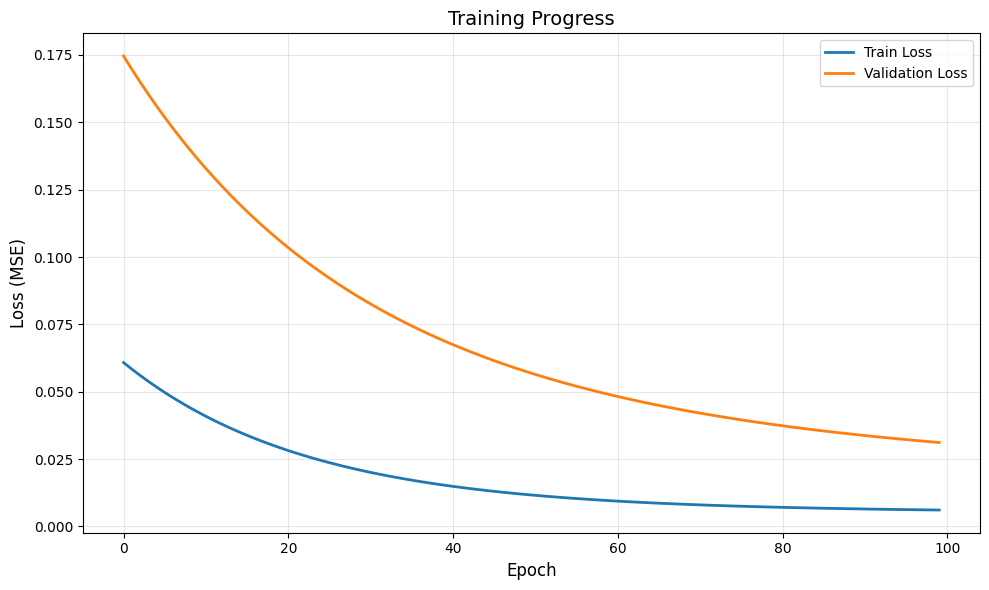

Training curve visualized!


In [69]:

# TODO: Plot training curves
plt.figure(figsize=(10, 6))
plt.plot(train_losses, label='Train Loss', linewidth=2)
plt.plot(val_losses, label='Validation Loss', linewidth=2)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss (MSE)', fontsize=12)
plt.legend(fontsize=10)
plt.title('Training Progress', fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("Training curve visualized!")

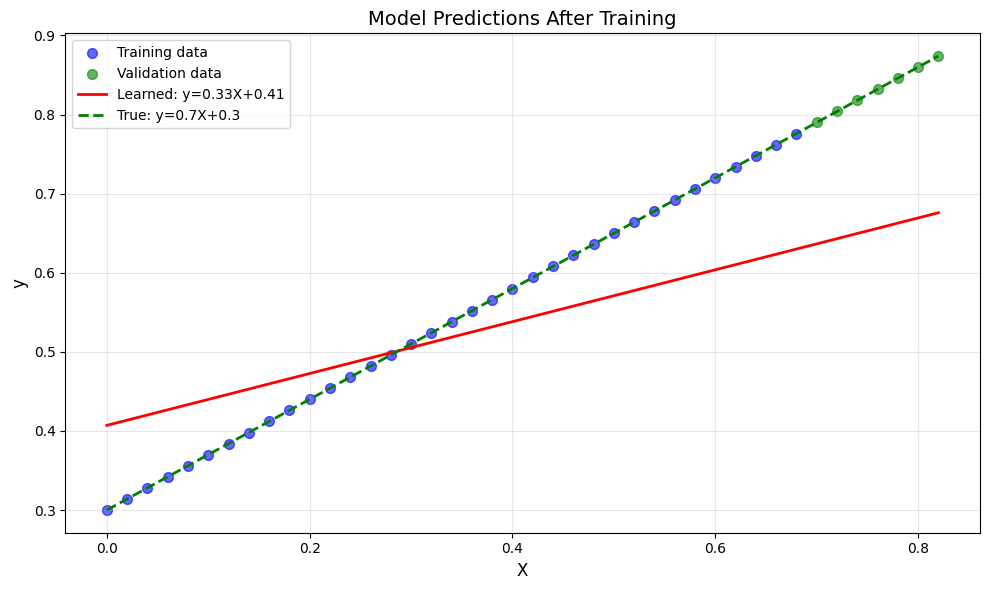

Predictions visualized!


In [70]:

# TODO: Visualize predictions
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, c='b', s=50, alpha=0.6, label='Training data')
plt.scatter(X_val, y_val, c='g', s=50, alpha=0.6, label='Validation data')

with torch.no_grad():
    X_all = torch.cat([X_train, X_val])
    y_pred_all = model(X_all)
    plt.plot(X_all, y_pred_all, 'r-', linewidth=2,
             label=f"Learned: y={model.weight.item():.2f}X+{model.bias.item():.2f}")
    plt.plot(X_all, weight * X_all + bias, 'g--', linewidth=2,
             label=f"True: y={weight}X+{bias}")

plt.xlabel('X', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.legend(fontsize=10)
plt.title('Model Predictions After Training', fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("Predictions visualized!")

In [71]:
print("\n" + "=" * 60)
print("Exercises")
print("=" * 60)


Exercises


In [72]:
# Exercise 1: Learning rate experiments
print("\nExercise 1: Learning rate experiments")
print("Tip: Create a loop over different learning rates and store results")
# TODO: Train with lr=0.001, 0.01, 0.1

learning_rates = [0.001, 0.01, 0.1]
results = {}

for learning_rate in learning_rates:
    print(f"\nTraining with learning rate = {learning_rate}")
    print("-"*60)
    model = LinearRegressionModel()
    optimizer = optim.SGD(model.parameters(), lr=learning_rate)

    train_losses = []
    val_losses = []
    
    for epoch in range(epochs):
        # Training
        model.train()
        y_pred = model(X_train)
        loss = criterion(y_pred, y_train)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_losses.append(loss.item())
        
        # Validation
        model.eval()
        with torch.no_grad():
            val_pred = model(X_val)
            val_loss = criterion(val_pred, y_val)
            val_losses.append(val_loss.item())

        # if epoch % 20 == 0:
        #     print(f"Epoch {epoch:3d}: Train Loss = {loss.item():.4f}, Val Loss = {val_loss.item():.4f}")
    print(f"\nFinal parameters for lr={learning_rate}:")
    print(f"  Weight: {model.weight.item():.4f} (true: {weight})")
    print(f"  Bias: {model.bias.item():.4f} (true: {bias})")

    results[learning_rate] = {
        "train": train_losses,
        "val": val_losses
    }


Exercise 1: Learning rate experiments
Tip: Create a loop over different learning rates and store results

Training with learning rate = 0.001
------------------------------------------------------------

Final parameters for lr=0.001:
  Weight: -1.0410 (true: 0.7)
  Bias: 0.0117 (true: 0.3)

Training with learning rate = 0.01
------------------------------------------------------------

Final parameters for lr=0.01:
  Weight: 2.2074 (true: 0.7)
  Bias: -0.2740 (true: 0.3)

Training with learning rate = 0.1
------------------------------------------------------------

Final parameters for lr=0.1:
  Weight: 0.6029 (true: 0.7)
  Bias: 0.3343 (true: 0.3)


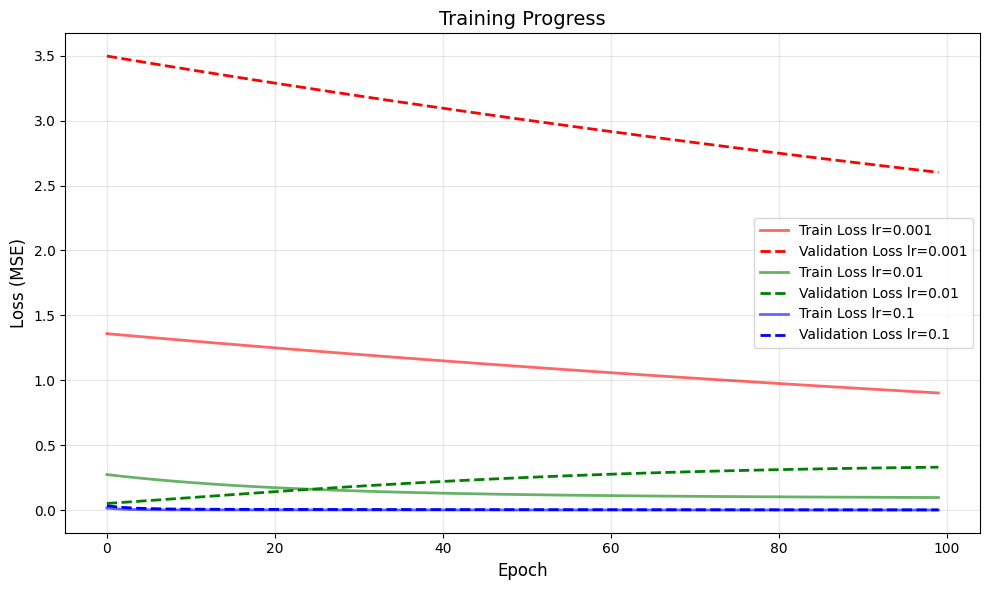

In [73]:
# TODO: Compare training curves
# TODO: Visualize all on same plot

# Plot training curves
plt.figure(figsize=(10, 6))
colors = ['r', 'g', 'b']
for learning_rate, color in zip(learning_rates, colors):
    plt.plot(results[learning_rate]["train"], label=f'Train Loss lr={learning_rate}', c=color, linewidth=2, alpha=0.6)
    plt.plot(results[learning_rate]["val"], label=f'Validation Loss lr={learning_rate}', linestyle='--', c=color, linewidth=2)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss (MSE)', fontsize=12)
plt.legend(fontsize=10)
plt.title('Training Progress', fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [74]:
# Exercise 2: Optimizer comparison
print("\nExercise 2: Optimizer comparison")
print("Tip: optim.Adam(model.parameters(), lr=0.01)")

# TODO: Compare SGD vs Adam
# TODO: Compare convergence speed
# TODO: Compare final results

optimizers = {
    "SGD": lambda params: optim.SGD(params, lr=0.01),
    "Adam": lambda params: optim.Adam(params, lr=0.01)
}
results_opt = {}

for opt_name, opt_function in optimizers.items():
    print(f"\nTraining with {opt_name} Optimizer")
    print("-" * 60)
    model = LinearRegressionModel()
    optimizer = opt_function(model.parameters())
    train_losses = []
    val_losses = []

    for epoch in range(100):
        # training
        model.train()
        y_pred = model(X_train)
        loss = criterion(y_pred, y_train)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_losses.append(loss.item())

        # validation
        model.eval()
        with torch.no_grad():
            val_pred = model(X_val)
            val_loss = criterion(val_pred, y_val)
            val_losses.append(val_loss.item())
        
        if epoch % 20 == 0:
            print(f"Epoch {epoch:3d}: Train Loss = {loss.item():.4f}, Val Loss = {val_loss.item():.4f}")

    print(f"\nComplete train model with {opt_name} optimizer")
    print(f"Weight: {model.weight.item()}")
    print(f"Bias: {model.bias.item()}")

    results_opt[opt_name] = {
        "train": train_losses,
        "val": val_losses
    }


Exercise 2: Optimizer comparison
Tip: optim.Adam(model.parameters(), lr=0.01)

Training with SGD Optimizer
------------------------------------------------------------
Epoch   0: Train Loss = 0.2065, Val Loss = 0.1389
Epoch  20: Train Loss = 0.0856, Val Loss = 0.0374
Epoch  40: Train Loss = 0.0367, Val Loss = 0.0065
Epoch  60: Train Loss = 0.0169, Val Loss = 0.0002
Epoch  80: Train Loss = 0.0088, Val Loss = 0.0014

Complete train model with SGD optimizer
Weight: 0.42960113286972046
Bias: 0.44223034381866455

Training with Adam Optimizer
------------------------------------------------------------
Epoch   0: Train Loss = 3.4305, Val Loss = 2.7571
Epoch  20: Train Loss = 2.5270, Val Loss = 1.7230
Epoch  40: Train Loss = 1.8031, Val Loss = 0.9684
Epoch  60: Train Loss = 1.2553, Val Loss = 0.4704
Epoch  80: Train Loss = 0.8586, Val Loss = 0.1789

Complete train model with Adam optimizer
Weight: 1.9336135387420654
Bias: -0.8407981991767883


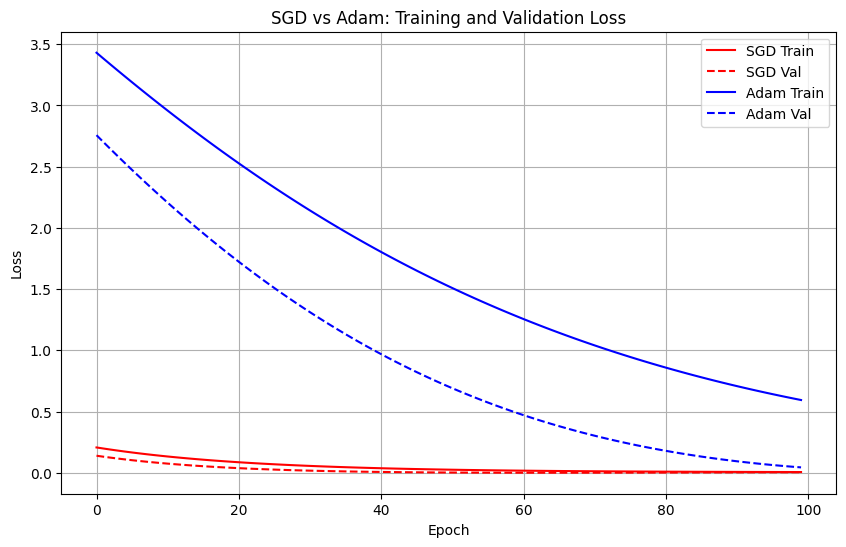

In [75]:
plt.figure(figsize=(10,6))
colors = ['r', 'b']
for opt_name, color in zip(results_opt, colors):
    plt.plot(results_opt[opt_name]["train"], c=color, label=f"{opt_name} Train")
    plt.plot(results_opt[opt_name]["val"], c=color, linestyle="--", label=f"{opt_name} Val")

plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("SGD vs Adam: Training and Validation Loss")
plt.legend()
plt.grid(True)
plt.show()

In [76]:
# Exercise 3: Early stopping
print("\nExercise 3: Early stopping")
# TODO: Implement early stopping
# TODO: Stop when val loss doesn't improve for N epochs
# TODO: Save best model
print("Tip: Track best_val_loss and use a patience counter")

model = LinearRegressionModel()
optimizer = optim.SGD(model.parameters(), lr=0.01)

patience = 10
train_losses = []
val_losses = []

patience_counter = 0
best_val_loss = float('inf')
best_model_state = None

for epoch in range(100):
    model.train()
    y_pred = model(X_train)
    loss = criterion(y_pred, y_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    train_losses.append(loss.item())

    # validation
    model.eval()
    with torch.no_grad():
        val_pred = model(X_val)
        val_loss = criterion(val_pred, y_val)
        val_losses.append(val_loss.item())

    # print progress
    if epoch%10==0:
        print(f"\nEpoch: {epoch}, Training loss: {loss.item()}, Validation loss: {val_loss.item}")

    # stop early
    if val_loss.item() < best_val_loss:
        patience_counter = 0
        best_val_loss = val_loss.item()
        best_model_state = model.state_dict() # save best weights
    else:
        patience_counter += 1
        # if over patience, stop training
        if patience_counter > 10:
            print(f"Early stopped at epoch: {epoch}, Training loss: {loss.item()}, Validation loss: {val_loss.item}")
            break


model.load_state_dict(best_model_state)

print(f"\nBest Validation Loss: {best_val_loss:.4f}")
print(f"Final parameters (best model):")
print(f"  Weight: {model.weight.item():.4f} (true: {weight})")
print(f"  Bias: {model.bias.item():.4f} (true: {bias})")



Exercise 3: Early stopping
Tip: Track best_val_loss and use a patience counter

Epoch: 0, Training loss: 0.12339544296264648, Validation loss: <built-in method item of Tensor object at 0x12ef37a10>

Epoch: 10, Training loss: 0.12026962637901306, Validation loss: <built-in method item of Tensor object at 0x12ef377d0>
Early stopped at epoch: 11, Training loss: 0.11999013274908066, Validation loss: <built-in method item of Tensor object at 0x12eef1c70>

Best Validation Loss: 0.3973
Final parameters (best model):
  Weight: -0.9787 (true: 0.7)
  Bias: 0.9396 (true: 0.3)


In [77]:
# Exercise 4: Loss functions
print("\nExercise 4: Different loss functions")
print("Tip: criterion = nn.L1Loss()")

# TODO: Try MAE (L1Loss)
# TODO: Compare with MSE
# TODO: Discuss differences

loss_functions = {
    "MSE": nn.MSELoss(),
    "MAE": nn.L1Loss()
}

epochs = 100
results_loss = {}

for loss_name, criterion in loss_functions.items():
    print(f"\nTraining with {loss_name} Loss")
    print("-" * 60)

    model = LinearRegressionModel()
    optimizer = optim.SGD(model.parameters(), lr=0.01)

    train_losses = []
    val_losses = []

    for epoch in range(epochs):
        ### Training
        model.train()
        y_pred = model(X_train)
        loss = criterion(y_pred, y_train)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_losses.append(loss.item())

        ### Validation
        model.eval()
        with torch.no_grad():
            val_pred = model(X_val)
            val_loss = criterion(val_pred, y_val)
            val_losses.append(val_loss.item())

        if epoch % 20 == 0:
            print(f"Epoch {epoch:3d}: Train Loss = {loss.item():.4f}, Val Loss = {val_loss.item():.4f}")

    print(f"\nFinal parameters for {loss_name}:")
    print(f"  Weight: {model.weight.item():.4f} (true: {weight})")
    print(f"  Bias: {model.bias.item():.4f} (true: {bias})")

    results_loss[loss_name] = {"train": train_losses, "val": val_losses}


Exercise 4: Different loss functions
Tip: criterion = nn.L1Loss()

Training with MSE Loss
------------------------------------------------------------
Epoch   0: Train Loss = 0.5468, Val Loss = 0.9440
Epoch  20: Train Loss = 0.2245, Val Loss = 0.4535
Epoch  40: Train Loss = 0.0942, Val Loss = 0.2333
Epoch  60: Train Loss = 0.0414, Val Loss = 0.1305
Epoch  80: Train Loss = 0.0200, Val Loss = 0.0802

Final parameters for MSE:
  Weight: 1.0875 (true: 0.7)
  Bias: 0.2397 (true: 0.3)

Training with MAE Loss
------------------------------------------------------------
Epoch   0: Train Loss = 1.5490, Val Loss = 2.1521
Epoch  20: Train Loss = 1.3259, Val Loss = 1.9004
Epoch  40: Train Loss = 1.1028, Val Loss = 1.6487
Epoch  60: Train Loss = 0.8796, Val Loss = 1.3970
Epoch  80: Train Loss = 0.6565, Val Loss = 1.1454

Final parameters for MAE:
  Weight: -0.4258 (true: 0.7)
  Bias: 0.2494 (true: 0.3)


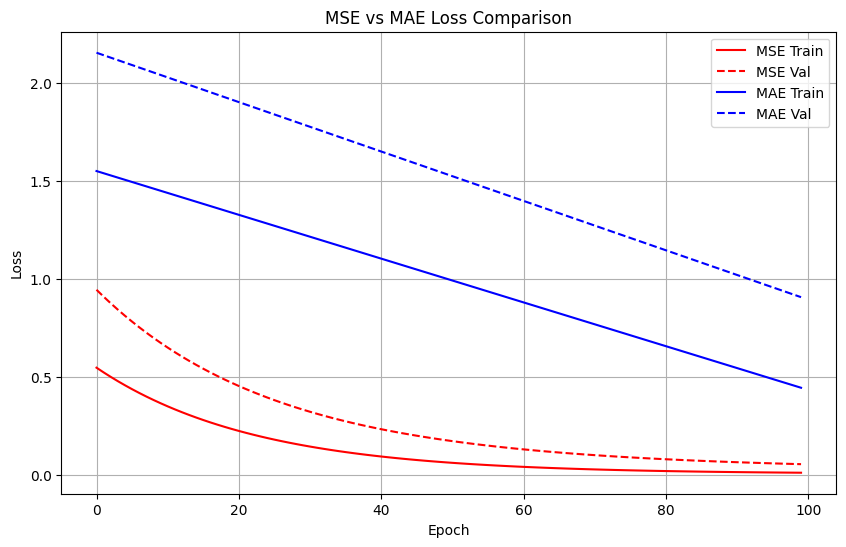

In [78]:
plt.figure(figsize=(10,6))
colors = ['r', 'b']

for loss_name, color in zip(results_loss, colors):
    plt.plot(results_loss[loss_name]["train"], c=color, label=f"{loss_name} Train")
    plt.plot(results_loss[loss_name]["val"], c=color, linestyle="--", label=f"{loss_name} Val")

plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("MSE vs MAE Loss Comparison")
plt.legend()
plt.grid(True)
plt.show()


Exercise 5: Training analysis
Tip: Store param.grad.item() each epoch to plot gradients
0.4668157994747162
Epoch   0: Train Loss = 0.3873, Val Loss = 0.7516
0.3084411025047302
Epoch  20: Train Loss = 0.1614, Val Loss = 0.3802
0.20759837329387665
Epoch  40: Train Loss = 0.0700, Val Loss = 0.2084
0.14332903921604156
Epoch  60: Train Loss = 0.0329, Val Loss = 0.1253
0.10231085121631622
Epoch  80: Train Loss = 0.0178, Val Loss = 0.0828


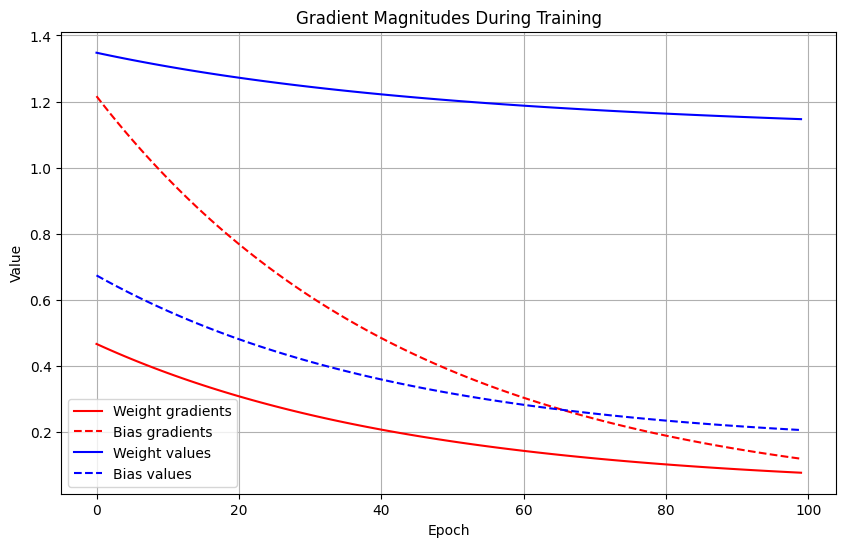

In [79]:
print("\nExercise 5: Training analysis")
# TODO: Plot gradient magnitudes during training
# TODO: Plot parameter updates
# TODO: Analyze convergence
print("Tip: Store param.grad.item() each epoch to plot gradients")

model = LinearRegressionModel()
optimizer = optim.SGD(model.parameters(), lr=0.01)
criterion = nn.MSELoss()

train_losses = []
val_losses = []

weight_grads = []
bias_grads = []

weight_values = []
bias_values = []

for epoch in range(100):
    # training
    model.train()
    y_pred = model(X_train)
    loss = criterion(y_pred, y_train)

    optimizer.zero_grad()
    loss.backward()
    
    # store gradients
    weight_grads.append(model.weight.grad.item())
    bias_grads.append(model.bias.grad.item())

    optimizer.step()

    train_losses.append(loss.item())

    # store parameter values after update
    weight_values.append(model.weight.item())
    bias_values.append(model.bias.item())

    ### Validation
    model.eval()
    with torch.no_grad():
        val_pred = model(X_val)
        val_loss = criterion(val_pred, y_val)
        val_losses.append(val_loss.item())

    if epoch % 20 == 0:
        print(model.weight.grad.item())
        print(f"Epoch {epoch:3d}: Train Loss = {loss.item():.4f}, Val Loss = {val_loss.item():.4f}")

plt.figure(figsize=(10, 6))
plt.plot(weight_grads, c='r', label="Weight gradients")
plt.plot(bias_grads, c='r', linestyle='--', label="Bias gradients")
plt.plot(weight_values, c='b', label="Weight values")
plt.plot(bias_values, c='b', linestyle='--', label="Bias values")
plt.xlabel("Epoch")
plt.ylabel("Value")
plt.title("Gradient Magnitudes During Training")
plt.legend()
plt.grid(True)
plt.show()

In [80]:
print("\n" + "=" * 60)
print("Exercise 3 Complete!")
print("Remember: Experiment, experiment, experiment!")
print("=" * 60)



Exercise 3 Complete!
Remember: Experiment, experiment, experiment!
